In [1]:
import re
import string

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns = 100

In [3]:
d_data = pd.read_csv("telecom_users.csv")

In [4]:
d_data.shape

(5986, 21)

In [5]:
d_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
d_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


- Create few rows missing values in a feature

In [7]:
d_data.loc[100:115, 'Partner'] = None

In [8]:
d_data.loc[4000:4099, 'gender'] = None

In [9]:
d_data.isna().sum()

customerID            0
gender              100
SeniorCitizen         0
Partner              16
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

- Create few rows to change data types

In [10]:
d_data.loc[d_data.SeniorCitizen==0, 'SeniorCitizen'] = 'No'

In [11]:
d_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Create 90% missing values in a feature

In [12]:
d_data['InstallApp'] = 'Yes'

In [13]:
d_data.loc[21:30, 'InstallApp'] = 'No'

In [14]:
d_data.loc[31:, 'InstallApp'] = None

In [15]:
d_data.isna().sum()

customerID             0
gender               100
SeniorCitizen          0
Partner               16
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
InstallApp          5955
dtype: int64

- Create email feature

In [16]:
email_extensions = ['@gmail.com', '@yahoo.com', '@outlook.com', '@rocketmail.com', '@apple.com', '@salesforce.com',
                   '@amail.comz', '@gmail.c', '@face_book.com', '@fall.com.sg']

In [17]:
len(email_extensions)

10

In [18]:
ALPHABET = np.array(list(string.ascii_letters))

In [19]:
def generate_email():
    email_idx = np.random.randint(0, len(email_extensions))
    name = "".join(np.random.choice(ALPHABET, 5).tolist())
    return name + email_extensions[email_idx]

In [20]:
d_data['email'] = [generate_email() for _ in range(len(d_data))]

In [21]:
d_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InstallApp,email
0,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Yes,pgtbg@salesforce.com
1,9688-YGXVR,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,Yes,VIxyZ@salesforce.com
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Yes,dPsvK@fall.com.sg
3,6994-KERXL,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,Yes,ceFXX@gmail.c
4,2181-UAESM,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,Yes,ASpHa@face_book.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes,None,vyvxQ@gmail.c
5982,5982-PSMKW,Female,No,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No,None,RmVDn@outlook.com
5983,8044-BGWPI,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,None,WhBXb@apple.com
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,None,kQvAy@gmail.com


- Create postal code feature

In [22]:
kodepos = np.random.randint(low=10000, high=99999, size=(d_data.shape[0]))

In [23]:
d_data['kodepos'] = kodepos

- Create datetime feature

In [24]:
from datetime import datetime

In [25]:
datetime(2021, 1, 31).strftime('%d/%m/%Y')

'31/01/2021'

In [26]:
def generate_date(month, year):
    if month == 2:
        high = 28
    elif month in [1,3,5,7,8,10,12]:
        high = 31
    else:
        high = 30
    
    date = np.random.randint(1,31)
    
    return datetime(year, month, date).strftime('%d/%m/%Y')

In [27]:
d_data['RecordedDate'] = [generate_date(1, 2021) for _ in range(len(d_data))]

In [28]:
d_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
InstallApp           object
email                object
kodepos               int32
RecordedDate         object
dtype: object

- Create another numeric feature

Age

In [29]:
d_data.loc[d_data.SeniorCitizen == 1, 'age'] = np.random.randint(45, 85, len(d_data.loc[d_data.SeniorCitizen == 1]))
d_data.loc[d_data.SeniorCitizen == 'No', 'age'] = np.random.randint(17, 45, len(d_data.loc[d_data.SeniorCitizen == 'No']))

Number of Send Messages

In [30]:
d_data.loc[d_data.age.between(60,85) ,'number_of_send_message'] = np.random.randint(10, 30, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'number_of_send_message'] = np.random.randint(20, 30, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'number_of_send_message'] = np.random.randint(40, 90, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'number_of_send_message'] = np.random.randint(90, 180, len(d_data.loc[d_data.age.between(17,25)]))

Number of Received Messages

In [31]:
d_data.loc[d_data.age.between(60,85) ,'number_of_received_message'] = np.random.randint(30, 40, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'number_of_received_message'] = np.random.randint(20, 30, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'number_of_received_message'] = np.random.randint(40, 90, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'number_of_received_message'] = np.random.randint(90, 180, len(d_data.loc[d_data.age.between(17,25)]))

Minutes of Call

In [32]:
d_data.loc[d_data.age.between(60,85) ,'minutes_of_call'] = np.random.randint(120, 300, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'minutes_of_call'] = np.random.randint(120, 150, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'minutes_of_call'] = np.random.randint(60, 180, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'minutes_of_call'] = np.random.randint(30, 90, len(d_data.loc[d_data.age.between(17,25)]))

Number of Call

In [33]:
d_data.loc[d_data.age.between(60,85) ,'num_of_call'] = np.random.randint(10, 15, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'num_of_call'] = np.random.randint(12, 17, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'num_of_call'] = np.random.randint(20, 30, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'num_of_call'] = np.random.randint(30, 60, len(d_data.loc[d_data.age.between(17,25)]))

Internet Usage

In [34]:
d_data.loc[d_data.age.between(60,85) ,'internet_usage_megabytes'] = np.random.randint(1024, 5120, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'internet_usage_megabytes'] = np.random.randint(1024, 20000, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'internet_usage_megabytes'] = np.random.randint(1024, 30000, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'internet_usage_megabytes'] = np.random.randint(1024, 51200, len(d_data.loc[d_data.age.between(17,25)]))

Netflix Usage

In [35]:
d_data.loc[d_data.age.between(60,85) ,'netflix_usage_megabytes'] = np.random.randint(512, 1024, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'netflix_usage_megabytes'] = np.random.randint(512, 1024, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'netflix_usage_megabytes'] = np.random.randint(5120, 10240, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'netflix_usage_megabytes'] = np.random.randint(5120, 10240, len(d_data.loc[d_data.age.between(17,25)]))

Youtube Usage

In [36]:
d_data.loc[d_data.age.between(60,85) ,'youtube_usage_megabytes'] = np.random.randint(512, 1024, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'youtube_usage_megabytes'] = np.random.randint(512, 1024, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'youtube_usage_megabytes'] = np.random.randint(5120, 10240, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'youtube_usage_megabytes'] = np.random.randint(5120, 10240, len(d_data.loc[d_data.age.between(17,25)]))

Games Usage

In [37]:
d_data.loc[d_data.age.between(60,85) ,'game_usage_megabytes'] = np.random.randint(1, 10, len(d_data.loc[d_data.age.between(60,85)]))
d_data.loc[d_data.age.between(40,60) ,'game_usage_megabytes'] = np.random.randint(1, 10, len(d_data.loc[d_data.age.between(40,60)]))
d_data.loc[d_data.age.between(25,40) ,'game_usage_megabytes'] = np.random.randint(512, 1024, len(d_data.loc[d_data.age.between(25,40)]))
d_data.loc[d_data.age.between(17,25) ,'game_usage_megabytes'] = np.random.randint(1024, 10240, len(d_data.loc[d_data.age.between(17,25)]))

Ping

In [38]:
d_data.loc[d_data.kodepos.between(10000, 60000) ,'average_internet_ping'] = np.random.randint(15, 90, len(d_data.loc[d_data.kodepos.between(10000, 60000)]))
d_data.loc[d_data.kodepos.between(60000, 80000) ,'average_internet_ping'] = np.random.randint(100, 150, len(d_data.loc[d_data.kodepos.between(60000, 80000)]))
d_data.loc[d_data.kodepos.between(80000, 100000) ,'average_internet_ping'] = np.random.randint(120, 300, len(d_data.loc[d_data.kodepos.between(80000, 100000)]))

Internet Speed

In [39]:
d_data.sort_values(by='average_internet_ping',inplace=True)

In [40]:
d_data.shape

(5986, 35)

In [41]:
denom = np.sort(np.random.normal(loc=0.0,scale=2,size=5986))

In [42]:
d_data['average_internet_speed_in_megabytes'] = ((300 - d_data.average_internet_ping) / 10) + denom

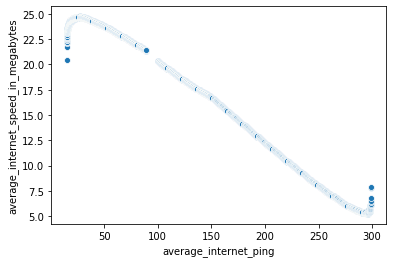

In [43]:
sns.scatterplot(y='average_internet_speed_in_megabytes', x='average_internet_ping', data=d_data)

- Create duplicate entries

In [44]:
d_data2 = d_data.loc[900:1000, :].copy()

In [45]:
d_data = d_data.append(d_data2, ignore_index=True)

In [46]:
d_data.shape

(7714, 36)

In [47]:
d_data.to_csv("telcom_user_extended.csv", index=False)

- Create another dataset for append, concatenate, merge, join

In [ ]:
d_data_dec = d_data.copy()

In [ ]:
d_data_dec['RecordedDate'] = [generate_date(12, 2020) for _ in range(len(d_data))]

In [ ]:
d_data_dec